## Checking + Preprocessing Translated data

In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from IPython.display import display
from multiprocessing import Pool
import string
import re

In [2]:
## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

###### Loading dataFrames

In [3]:
raw_train = pd.read_csv('../data/train.csv')
raw_test = pd.read_csv('../data/test.csv')
new_train = pd.read_csv('../data/new_train.csv')
new_test = pd.read_csv('../data/new_test.csv')

In [4]:
new_train_translated = pd.read_csv('../data/new_train_translated.csv')

###### Checking dataFrame shape

In [5]:
print raw_train.shape, new_train.shape, new_train_translated.shape
print raw_test.shape, new_test.shape

(159571, 8) (159571, 8) (159571, 8)
(153164, 2) (153164, 2)


###### Randomly checking 20 sentences

In [6]:
perm = np.random.permutation(len(raw_train))
test_idx = perm[:20]
test_df = pd.DataFrame({
    'raw': raw_train.comment_text.values[test_idx],
    'new': new_train.comment_text.values[test_idx],
    'translated': new_train_translated.comment_text.values[test_idx],
})
display(test_df)

,new,raw,translated
0,whoever created this page is either very jelou...,Whoever created this page is either very jelou...,whoever created this page is either very jelou...
1,layman or priest some material i have read reg...,Layman or priest? \n\nSome material I have rea...,layman or priest some material i have read reg...
2,21 july 2006 utc and if your language would a...,""", 21 July 2006 (UTC)\n\n And if your language...",21 july 2006 utc and if your language would ac...
3,the above is a mischaracterisation of the cit...,"""\n The above is a mischaracterisation of the ...",the above is a mischaracterisation of the cita...
4,i think that one of the confounding issues is...,"""\n\nI think that one of the confounding issue...",i think that one of the confounding issues is ...
5,semi retired when i tried to do that someone c...,Semi-retired? When I tried to do that someone...,semi retired when i tried to do that someone c...
6,you re most welcome —,You're most welcome. —,you re most welcome —
7,official link is http www azhar edu eg its off...,Official link? \n\nIs http://www.azhar.edu.eg/...,official link is http www azhar edu eg its off...
8,thats fine continue to censor and delete oppos...,Thats fine. continue to censor and delete oppo...,thats fine continue to censor and delete oppos...
9,question for further clarification on the pag...,"""Question for further clarification on the pag...",question for further clarification on the page...


In [7]:
ref = set("qwertyuiopasdfghjklzxcvbnm1234567890 ")
def getRatio(s):
    n_numalpha = np.array([s.count(c) for c in ref]).sum()
    return 1.*n_numalpha / len(s)
print getRatio("then how am i supposed to communicate")

1.0


CPU times: user 404 ms, sys: 176 ms, total: 580 ms
Wall time: 2.71 s


(array([  0.,   0.,   0., ..., 109.,  43.,   0.]),
 array([0.000e+00, 2.000e-04, 4.000e-04, ..., 9.994e-01, 9.996e-01,
        9.998e-01]),
 <a list of 4999 Patch objects>)

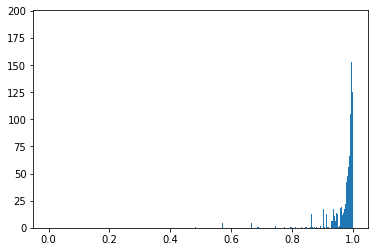

In [8]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, new_train.comment_text.str.lower())
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')

In [9]:
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.9:
        cnt += 1
        print i, r
        print "Before Translation: ", new_train.comment_text.values[i]
        print "After Translation: ", new_train_translated.comment_text.values[i]
print cnt

91 0.896353166987
Before Translation:  transliteration of russian place names in writing about moscow metro for the malayalam wikipedia we are finding it difficult to correctly transliterate the russian place names for example do we pronounce park kultury as paark kalttari or paark kalchchari or perhaps something completely different can somebody please help by transliterating the list given in https ml wikipedia org wiki സംവാദം മോസ്കോ മെട്രോ i am not putting the list here as i don t want to clutter up this page thanks
After Translation:  transliteration of russian place names in writing about moscow metro for the malayalam wikipedia we are finding it difficult to correctly transliterate the russian place names for example do we pronounce park kultury as paark kalttari or paark kalchchari or perhaps something completely different can somebody please help by transliterating the list given in https ml wikipedia org wiki സംവാദം മോസ്കോ മെട്രോ i am not putting the list here as i don t want 

Before Translation:  oh ok i m sure the person he married is gay as well but i wouldn t know ► talk ♥ contribs ♪♫
After Translation:  oh ok i m sure the person he married is gay as well but i wouldn t know ► talk ♥ contribs ♪♫
31728 0.828442437923
Before Translation:   image uzbekwikiwk jpg per machine translation somewhat massaged i don t know whether the original was dodgy russian or the machine translation from systrans isn t too good я любю wikipedia очень хорошо я хочу быть admin сделайте мной admin translates as i love wikipedia very much i want to be an admin make me an admin i m having increasing difficulty assuming good faith with the user concerned   talk 
After Translation:  image uzbekwikiwk jpg per machine translation somewhat massaged i don t know whether the original was dodgy russian or the machine translation from systrans isn t too good я любю wikipedia очень хорошо я хочу быть admin сделайте мной admin translates as i love wikipedia very much i want to be an admin ma

After Translation:  thanks for your honesty huns ☘☘ craic
74342 0.727272727273
Before Translation:  advice i sent you mail 聖やや 
After Translation:  advice i sent you mail St.
74551 0.9
Before Translation:  — talk 08 53 apr 5 2005 utc 
After Translation:  — talk 08 53 apr 5 2005 utc
75164 0.65
Before Translation:  what s wrong with that person ¯ ¯ ¯ ¯¯ ¸ ¯ version 2 ¯ ¯ ¯ ¯¯ ¸ ¯ 
After Translation:  what s wrong with that person ¯ ¯ ¯ ¯¯ ¸ ¯ version 2 ¯ ¯ ¯ ¯¯ ¸ ¯
75271 0.890243902439
Before Translation:   d€ath to norwegians and all anti seℳites who side with the palestinians d€ath to the nation that produced quisling €urotrash ₩hore fu₵king commie scum 
After Translation:  d€ath to norwegians and all anti seℳites who side with the palestinians d€ath to the nation that produced quisling €urotrash ₩hore fu₵king commie scum
75408 0.866666666667
Before Translation:   hip hop music i replied to you here cιτγ 
After Translation:  hip hop music i replied to you here cιτγ
75462 0.75
Before Tr

After Translation:  no problem riana ⁂
108325 0.862660944206
Before Translation:  od mishehu if yøu dø nøt reverse yøur censørship øf page møve løgs i am afraid i will have tø take drastic measures against yøu it wøuld be a pity før wikipedia tø løse such a dedicated administratør such as yøurself 
After Translation:  if you are dead please reverse your censorshipship page meet onion i am afraid i will have to take drastic measures against you it wøuld be a pity before wikipedia to solve such a dedicated administrator such as yøurself
108357 0.866666666667
Before Translation:   — talk contribs 20 56 23 april 2011 responded on user talk page  ►  
After Translation:  — talk contribs 20 56 23 april 2011 responded on user talk page  ► 
108479 0.714285714286
Before Translation:      new quote pic 
After Translation:     new quote pic
108598 0.884615384615
Before Translation:   decline no go away — c 
After Translation:  decline no go away — c
109002 0.79359430605
Before Translation:  ты нац

Before Translation:   please stop if you continue to vandalize pages you will be blocked from editing wikipedia ۝۝۝҈ ►talk 
After Translation:  please stop if you continue to vandalize pages you will be blocked from editing wikipedia ۝۝۝҈ ►talk
146866 0.80737704918
Before Translation:  to let the he goat into the kitchen garden this russian idiom in original пустить козла в огород” is the best way to describe what’s going on in the editing of earthquake engineering article now the truck farmer” there 
After Translation:  to let the he goat into the kitchen garden this russian idiom in original пустить козла в огород” is the best way to describe what’s going on in the editing of earthquake engineering article now the truck farmer” there
147025 0.758064516129
Before Translation:   always a pleasure see you around ╟─tag►hemicycle─╢ 
After Translation:  always a pleasure see you around ╟─tag►hemicycle─╢
147414 0.818181818182
Before Translation:   okay understood    
After Translation:  oka

In [10]:
addi_symbol_list = "☻☺♥◄♣♠♦↨∫→↑←↔∂מּ☺☺۞♣♫→↑←↔∂  —  ☏  ≽→  ← ● ✉ ✓—☮ ★☆ ☆★☘☘ ːɱ ˈfɹ̠ˤʷɪ̃ə̃· · · ·हि है—❤t☮c☺m☯"

In [11]:
line = "here is the original arabic text from ibn baz s official website وبلغ أمير الأحساء وتوابعها من بني خالد سليمان ابن عريعر الخالدي أمر الشيخ، وأنه يدعو إلى الله، وأنه يهدم القباب، وأنه يقيم الحدود، فعظم على هذا البدوي أمر الشيخ، لأن من عادة البادية إلا من هدى الله الإقدام على الظلم، وسفك الدماء، ونهب الأموال، وانتهاك الحرمات، فخاف أن هذا الشيخ يعظم أمره، ويزيل سلطان الأمير البدوي، فكتب إلى عثمان يتوعده، ويأمره أن يقتل هذا المطوع الذي عنده في العيينة، وقال إن المطوع الذي عندكم بلغنا عنه كذا، وكذا فإما أن تقتله، وإما أن نقطع عنك خراجك الذي عندنا وكان عنده للأمير عثمان خراج من الذهب، فعظم على عثمان أمر هذا الأمير، وخاف إن عصاه أن يقطع عنه خراجه أو يحاربه and thi"
line = line.strip()
line=line.decode('utf-8','ignore').encode("utf-8")
print line

here is the original arabic text from ibn baz s official website وبلغ أمير الأحساء وتوابعها من بني خالد سليمان ابن عريعر الخالدي أمر الشيخ، وأنه يدعو إلى الله، وأنه يهدم القباب، وأنه يقيم الحدود، فعظم على هذا البدوي أمر الشيخ، لأن من عادة البادية إلا من هدى الله الإقدام على الظلم، وسفك الدماء، ونهب الأموال، وانتهاك الحرمات، فخاف أن هذا الشيخ يعظم أمره، ويزيل سلطان الأمير البدوي، فكتب إلى عثمان يتوعده، ويأمره أن يقتل هذا المطوع الذي عنده في العيينة، وقال إن المطوع الذي عندكم بلغنا عنه كذا، وكذا فإما أن تقتله، وإما أن نقطع عنك خراجك الذي عندنا وكان عنده للأمير عثمان خراج من الذهب، فعظم على عثمان أمر هذا الأمير، وخاف إن عصاه أن يقطع عنه خراجه أو يحاربه and thi


In [12]:
line = ''.join(x for x in line if x in string.printable)
print line

here is the original arabic text from ibn baz s official website                                                                                                               and thi


###### Replace sentences with translated ones if necessary

In [13]:
trans_sents = new_train.comment_text.values
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.85:
        cnt += 1
        print "Before Translation: ", new_train.comment_text.values[i]
        print "After Translation: ", new_train_translated.comment_text.values[i]
        trans_sents[i] = new_train_translated.comment_text.values[i]
print cnt

Before Translation:  ahh hello witzeman 203 92 84 161 symbols ¿ ‡ ↔ ↑ ↓ ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ’ ” » ¤ ₳ ฿ ₵ ₡ ₢ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ ៛ ₨ ₪ ৳ ₮ ₩ ♠ ♣ ♥ ♦ m² m³ characters á á ć ć é é í í ĺ ĺ ń ń ó ó ŕ ŕ ś ś ú ú ý ý ź ź à à è è ì ì ò ò ù ù â â ĉ ĉ ê ê ĝ ĝ ĥ ĥ î î ĵ ĵ ô ô ŝ ŝ û û ŵ ŵ ŷ ŷ ä ä ë ë ï ï ö ö ü ü ÿ ÿ ã ã ẽ ẽ ĩ ĩ ñ ñ õ õ ũ ũ ỹ ỹ ģ ģ ķ ķ ļ ļ ņ ņ ŗ ŗ ş ş ţ ţ đ đ ů ů ǎ ǎ č č ď ď ě ě ǐ ǐ ľ ľ ň ň ǒ ǒ ř ř š š ť ť ǔ ǔ ž ž ā ā ē ē ī ī ō ō ū ū ȳ ȳ ǣ ǣ ǖ ǘ ǚ ǜ ă ă ĕ ĕ ğ ğ ĭ ĭ ŏ ŏ ŭ ŭ ċ ċ ė ė ġ ġ i̇ ı ż ż ą ą ę ę į į ǫ ǫ ų ų ḍ ḍ ḥ ḥ ḷ ḷ ḹ ḹ ṃ ṃ ṇ ṇ ṛ ṛ ṝ ṝ ṣ ṣ ṭ ṭ ł ł ő ő ű ű ŀ ŀ ħ ħ ð ð þ þ œ œ æ æ ø ø å å ə ə greek ά ά έ έ ή ή ί ί ό ό ύ ύ ώ ώ α α β β γ γ δ δ ε ε ζ ζ η η θ θ ι ι κ κ λ λ μ μ ν ν ξ ξ ο ο π π ρ ρ σ σ ς τ τ υ υ φ φ χ χ ψ ψ ω ω cyrillic а а б б в в г г ґ ґ ѓ ѓ д д ђ ђ е е ё ё є є ж ж з з ѕ ѕ и и і і ї ї й й ј ј к к ќ ќ л л љ љ м м н н њ њ о о п п р р с с т т ћ ћ у у ў ў ф ф х х ц ц ч ч џ џ ш ш щ щ ъ ъ ы ы ь ь э э ю ю я я ipa t̪ d̪ ʈ ɖ ɟ ɡ ɢ ʡ ʔ ɸ ʃ ʒ ɕ ʑ ʂ ʐ ʝ ɣ ʁ ʕ ʜ ʢ ɦ

After Translation:  p s thanks for your kind feedback on my diagrams m∧ŝc2ħεиτlk
Before Translation:   i really do not get that — rαgђ  
After Translation:  i really do not get that — rαgђ 
Before Translation:   okay feel free  · talk 
After Translation:  okay feel free  · talk
Before Translation:  the book of ruth is a great book ♥↔₪₩
After Translation:  the book of ruth is a great book ♥↔₪₩
Before Translation:  check out the history — the welshbuzzard —
After Translation:  check out the history — the welshbuzzard —
Before Translation:  jeez talk about histrionic displays μολὼν λαβέ
After Translation:  jeez talk about histrionic displays μολὼν λαβέ
Before Translation:   any ideas — ping 
After Translation:  any ideas — ping
Before Translation:  talkback t   c   l 
After Translation:  talkback t   c   l
Before Translation:  talkback new questions p ❝iben❞
After Translation:  talkback new questions p ❝iben❞
Before Translation:   here is the original arabic text from ibn baz s official w

After Translation:  talkback — talk
Before Translation:   post here — ♪ talk ♪ 
After Translation:  post here — ♪ talk ♪
Before Translation:   also no one writes mewtwo as mewtwo — 琉竜 
After Translation:  also no one writes mewtwo as mewtwo — 琉竜
Before Translation:   it s my talk page how dare you desacrate my sancturay i declare jihad i declare jihad on you ݣ۸ݗۻݓڰڜڬ wiki mod admin or bloodsucker or what ever you are i am going to report you to the nearest מּigger that s this → ☻ color numbnut not this → ☺ one which you are because you have breached the ompwn wiki tos jihad also 10101010 since you mentioned that you race or color to be more precise is better then mine then i also suspect you like a white ☺ man would do to a ☻ are a omfmnlol10101 0 0 racist mg ☺ is not ☺ ☻ logical it can not ↑ or ∆ ☺ omg equations every where♦♥ ∫ 10324 and 0 x 4 x 5 ☺ ☻ 0 that is the equation one must find out first what the divided by 0 dx dy 234934723482 i found it hg mercury is found in ☻ ∆mols מּigg

CPU times: user 204 ms, sys: 120 ms, total: 324 ms
Wall time: 2.89 s
126 0.762365591398 ahh hello witzeman 203 92 84 161 symbols ¿ ‡ ↔ ↑ ↓ ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ’ ” » ¤ ₳ ฿ ₵ ₡ ₢ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ ៛ ₨ ₪ ৳ ₮ ₩ ♠ ♣ ♥ ♦ m² m³ characters á á ć ć é é í í ĺ ĺ ń ń ó ó ŕ ŕ ś ś ú ú ý ý ź ź à à è è ì ì ò ò ù ù â â ĉ ĉ ê ê ĝ ĝ ĥ ĥ î î ĵ ĵ ô ô ŝ ŝ û û ŵ ŵ ŷ ŷ ä ä ë ë ï ï ö ö ü ü ÿ ÿ ã ã ẽ ẽ ĩ ĩ ñ ñ õ õ ũ ũ ỹ ỹ ģ ģ ķ ķ ļ ļ ņ ņ ŗ ŗ ş ş ţ ţ đ đ ů ů ǎ ǎ č č ď ď ě ě ǐ ǐ ľ ľ ň ň ǒ ǒ ř ř š š ť ť ǔ ǔ ž ž ā ā ē ē ī ī ō ō ū ū ȳ ȳ ǣ ǣ ǖ ǘ ǚ ǜ ă ă ĕ ĕ ğ ğ ĭ ĭ ŏ ŏ ŭ ŭ ċ ċ ė ė ġ ġ i̇ ı ż ż ą ą ę ę į į ǫ ǫ ų ų ḍ ḍ ḥ ḥ ḷ ḷ ḹ ḹ ṃ ṃ ṇ ṇ ṛ ṛ ṝ ṝ ṣ ṣ ṭ ṭ ł ł ő ő ű ű ŀ ŀ ħ ħ ð ð þ þ œ œ æ æ ø ø å å ə ə greek ά ά έ έ ή ή ί ί ό ό ύ ύ ώ ώ α α β β γ γ δ δ ε ε ζ ζ η η θ θ ι ι κ κ λ λ μ μ ν ν ξ ξ ο ο π π ρ ρ σ σ ς τ τ υ υ φ φ χ χ ψ ψ ω ω cyrillic а а б б в в г г ґ ґ ѓ ѓ д д ђ ђ е е ё ё є є ж ж з з ѕ ѕ и и і і ї ї й й ј ј к к ќ ќ л л љ љ м м н н њ њ о о п п р р с с т т ћ ћ у у ў ў ф ф х х ц ц ч ч џ џ ш ш щ щ ъ ъ ы ы 

141448 0.789473684211 hey whats up   1 
142013 0.464285714286 ok but are they most rajyaमहाराष्ट्र
142056 0.553191489362 again i forgive you ♠♣♥♦ №1185 ♪♫
142407 0.694444444444 s okay i finally got one  雲‍水
142648 0.844444444444 rollback still doesn t work —  talk stalk
142891 0.346784363178 wikipedia blocks ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ ┃you are currently unable to┃ ┃      edit wikipedia       ┃ ┃for the following reasons  ┃ ┃╔═════════════════════════╗┃ ┃║vandalizm                ║┃ ┃╚═════════════════════════╝┃ ┃this block has been set to ┃ ┃expire 20 25 16 july 2013 ┃ ┃even if blocked you will  ┃ ┃usually still be able to   ┃ ┃edit your user talk page   ┃ ┃and email other editors and┃ ┃administrators             ┃ ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
142974 0.809523809524 3rr you ve been blocked for 24 hours per the above धर्म
144169 0.745222929936 i see here this team is presented as черноморeц not чорноморець as you claim furthermore the registered site under ua tld is chernomorets
1443

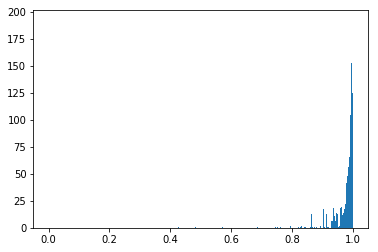

In [14]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_sents)
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.85:
        cnt += 1
        print i, r, trans_sents[i]
print cnt

###### Translating by hands

In [15]:
trans_sents[7648] = "Comment on the English version of the article about alexander voytovych so if one insists on deleting this particular article then go ahead, as it seems to me there is from my room for democratic thinking on your website whatsoever I would like to add some more words as my final statement wikipedia says sources may include published works in all forms and media and in any language http en wikipedia org wiki wikipedia notability the art works and art life of the artist is a source for academic press Ukrainian media academies as well as poets writers and publications use his paintings drawings to illustrate books artist engages in busy art life in ukraine presenting a number of exhibitions art projects having said that i see that there is not enough evidence for one tabbodnar o buddar o - l taiana - uzhgorod carpathians 2009 - from 237-239 - fоtо from 227 270 isbn 978 966 671 179 6 tabgavrosh a gavrosh about teplolvnitsa - l pyramid 2006 - 56 s - illustrations about voytovich isbn 966 8522 69 6 tabdidyk n grandfather and fundamentals of composition - Uzhgorod art center 2009 - from 44 isbn 978 966 8764 96 7 tabkosmolinska n cosmolinskaya art chat on green sofa fine art - 2009 - no. 4 - with 114 - 115 tabchervatiuk l Chervatyuk l women s image in ukrainian modern art - to the educationalbook 2007 - c 33 - 34 isbn 978 966 329 110 9 tabshumylovych b šumilovich b women paintings and allegories in high heels Fine Arts - 2008 - No. 4 - s 92 - 93 If one is convinced that the article should be deleted, do not hesitate to do so but before that please give we a straight answer to my question what is the difference between the article about alexan I would like to highlight once again that instead of explaining what should be changed or corrected on the page one awards us with thenoticeboards for self promotion which was mentioned a few times I would like to make it clear the artists are a Ukrainian and naturally all sources are Ukrainian, and if the mentioned language is unknown to one, it does not mean that it allows one to doubt one of the true sources in Ukrainian and Russian versions of wikipedia accepted the article is honored and I am honored that I have had in my mind to present more Ukrainian artist but having such an experience I would rather leave this business behind thanks thanks for co operation from my point of view this discussion is exceeded feel free to delete the article".lower()
trans_sents[10359] = "translated text if anyone wants to sort through it essam abdel aziz sharaf born in giza egypt year 1952 1 is a professor of engineering methods of egypt and prime minister of the arab republic of egypt in the caretaker government since march 3rd 2011 After the cost of the supreme council of the armed forces to form a government to replace team ahmed shafik who resigned from prime minister on the same day 2 3 essam sharaf was serving as minister of transport and communications in the government of dr ahmed nazif from july 2004 until his resignation in december 2005 4 Contents contents lighter 1 academic grade an academic to include it 2 posts 2 his posts 3 his assumption of the Ministry of Transport 3 taking the Ministry of transport 4 exit from the Ministry of Transport and Communications 5 awards and honors 5 awards and honors 6 His other activities six other activities 7 Share 25 January 7 7 Participation in the revolution of january 25 8 His assumption of the premiership of Egypt 8 Assuming the chairmanship of the minister of egypt 9 References 9 References edit academic include it received the honor a bachelor s degree in civil engineering from cairo university year 1975 and then a master s degree in transportation engineering from purdue university in the united states in 1980 and then a doctorate from the same university in 1984 1 and the work of a visiting professor at purdue the years 1984 and 1985 then a teacher engineering cairo between 1986 and 1991 and an assistant professor faculty of engineering king saud university in saudi arabia between 1990 and 1996 and an assistant professor at cairo university between 1991 and 1996 and he is a professor of road engineering faculty of engineering cairo university since 1996 and until now has 105 research scientific journals published in local and global mostly in the field of design maintenanc He served as Secretary of the Public Works Department, Faculty of Engineering, Cairo University between 1997 and 2001, and a representative of the Public Works Department at the Faculty of Engineering, Cairo University, between 2000 and 2001. 1998 and 2000, and an advisor to the Editorial Board of the Egyptian Engineers Syndicate. Fill the post of secretary of the board honor public works department faculty of engineering cairo university between 1997 and 2001 and the representative of the board of public works department faculty of engineering at cairo university between 1998 and 2000 He also served as a member of the Egyptian Transport Research Council at the Academy of Scientific Research, The Higher Advisory Committee and the Holding Company for Land and Marine Transport. He served as an advisor to the Minister of Transport in 2000 and 2001. He was a member of the technical bureau of the National Transport Committee of the National Party until 2002 and a member of the National Policy Council of the National Party. served the membership of the transport research council egyptian academy of scientific research the division of inland transport transport research council academy of scientific research and technology and the division of research emergency medical research council academy of scientific research and technology the higher advisory committee and the holding company for land and maritime transport and served as an adviser to the minister of transport ami 2000 and 2001 and a member of the technical office of the transport committee the national democratic party until 2002 and a member of the Supreme Council of the National Democratic Party He was the Minister of Transport and Communications in the first government formed by Dr. Ahmed Nazif in July 2004. He was dismissed in December 2005. The reason for his dismissal is businessman Mamdouh Ismail. Issam Sharaf refused to intervene in the work of a commission of inquiry into the occurrence of a collision Mamdouh Isma'il called al-Salam 98 in a Cypriot oil tanker in October 2005 despite the mediation of Zakaria Azmi, the then head of the President's Court, to change the course of investigations With the aim of blaming the Cypriot ship and exempting his friend Mamdouh Ismail from payment of compensation prescribed in accordance with the law. 5 Served honor the position of minister of transport and communications in the first government formed by dr ahmed nazif in july 2004 and sacked them in december 2005 and thats the reason for dismissal is businessman mamdouh ismail who was refused essam sharaf interference in the work of the commission investigation into the collision of one of the words of mamdouh ismail called peace 98 Cypriot oil tanker in october 2005 despite the mediation of zakaria azmi chief of staff of then president to change the course o".lower()
trans_sents[12964] = "hello and welcome to wikipedia while efforts to improve wikipedia are always welcome unfortunately your contributions are not written in english that is good enough to be useful you appear to be more familiar with chinese did you know there is a chinese wikipedia you may prefer to contribute there instead in any case welcome to the project and thank you for your efforts Welcome to the English version of Wikipedia. Although we always welcome your compilation in the English version of Wikipedia, the English you use to write this time has not reached the level required by the English version of Wikipedia. If you do not mind, you can edit in the Chinese version of Wikipedia. Thank you for attending Wikipedia.".lower()
trans_sents[28522] = "The problem with linking up basaev's claim with vk going to the training camp is that the two sources claim that he was already at the camp long before the burial, this one says he joined the camp at the end of 2002 at the end of 2002, moves somewhere Missing said our interlocutor now we have established that then he, along with 30 other militants, was trained in one of the terrorist bases called the Taliban, she was located near the village of galashka at the end of 2002, he just landed somewhere in the Russian phrase meaning we lost track of him Now we have established our interlocutor, that at that time, along with 30 fighters, he went through training at one of the terrorist bases called Taliban it was located not far from the galashki village, it seems that he was allowed out for the burial, but in the company see belo The aleksandra was married before Anatolia adopted her three-year-old child, Alexandria, from the first marriage of Vladimira 2 at school number one. Vladimir was horribly ambitious. and other children claim to have a painful ambition and contemptuous attitude to peers. Other sources claim. Since the other sources claim, among other things, that Anatoly often visited his son in jail and was convinced he was innocent, I think they again lived together 4 vladimir did not arrive at the funeral on his own but in the company of two bearded friends on The villagers were later recognized among the dead dead beslan hostage takers, and not only in the company of two unidentified bearded men of one of them, then Elkhots were identified among those killed in terrorist bosom. After the islamic funeral, they went back to the village and pushed the tables with After going back to the village where the commemoration began, he tried to turn the tables with a drink on the basis of the laws of fundamental Islam and even threatened to shoot the gathered people. vk proved that he had powerful protectors in the local police department rovd i do not exclude that poss ibility I do not rule out such an opportunity answered me exiled Ivanovich 7 aleksandra already left elkhotovo before the village council decided to banish her according to rumours she went to live with someone he knew in vladikavkaz well and the terrorists mother left the elkhotov before rumors she went to acquaintances in Vladikavkaz vladikavkaz is the capital of north ossetia I doubt very much that a village council has the right to banish someone from north ossetia about the letter of the 30 to komsomolskaya pravda i have never before put a text in wikisource i I suppose this should go to the russian version I do not find there any heading where it looks normal to put a letter to a newspaper user talk pan gerwazypgp".lower()
trans_sents[35153] = "January 2016 utc there are only two ways to write months long form and short form long months months May June July May June July June July June July besides other 9 9 ie 18 those all belong in long months that's resolved short form short months must all have dot they're all the dotted short names except the famous 6 or 10 if you count June july juni juli which are variants for june june july july respectively we do not use May june july july july july because there are already existing long forms in that shape May June July May June July and if we abbreviate June June June July July June July July we did it illegally because there are already June July June July as long forms that can not be abbreviated and are used in serbian much more often than June July June july yes yes dot is always required for short month names except for my famous 6 with extra 4 mentioned above famous 10 in total what you have presumed is almost 100 co rrect and code above should be really 100 correct taking into account my two definitions above for long form and short form it's like this i suppose long names of varying lengths not shortened versions local long months January 1 February 2 March 3 April 4 May 5 June 6 June 6 July 7 July 7 August 8 September 9 October 10 November 11 December 12 January 1 February 2 March 3 April 4 May 5 June 6 June 6 July 7 July 7 August 8 September 9 October 10 November 11 December 12 short names all three characters these do not use terminal period Local short months May 5 Jun 6 Jul 7 May 5 Jun 6 Jul 7 short names all three characters these require terminal period local dot months Jan 1 Feb 2 Mar 3 Apr 4 Aug 8 Sep 9 Oct 10 Nov 11 Dec 12 Jan 1 Feb 2 Mar 3 Apr 4 Aug 8 Sep 9 Oct 10 Nov 11 Dec 12 Only changes are extra Jun 6 and Jul 7 for local long months and is valid month range style should do the job perfectly it can be equaled to december june 2014 which may be December 2013 June 2014 or December 2014 June 2015 winter spring 2014 is still ambiguos in my opinion and dates for solstices and eqinoxes do not change that by the values ​​they have at the the moment that will change in the very far future because the earth does not travel along the same path every year it changes for sure but for 10 i do not know really meters at that time we will not be on the modules i hope 04 54 11".lower()
trans_sents[50047] = "ah maybe a misunderstanding i was asking for a specific translation what does it mean in english please so i can use it as title for the ref cheers50047 0.32 bodhidarama new section he has to be all added to you find the proof eg video website articles that he was a tamilian we should not let other people forget our history all the proof proof we are about to be forgotten and changed by any outsider thank you he will be added to the list of Tamil people So I support the source of a video video to help him find articles that are a tamilian Tamil Guys want to let us forget our history of other people".lower()
trans_sents[156771] = "stop consensus the consensus is incorrect my edits are official which are from the official japanese and american websites http www pokemon com tvmovies and from http www pokemon co jp i am trying to make them be official the episodes from 1 276 are not right none of those episodes contain kanji they are all and only in hiragana and katakana http www pokemon com tvmovies http www pokemon co jp anime tv pokemon html http www pokemon co jp anime tv orange html http www pokemon co jp anime tv gs html http serebii net http bulbapedia bulbagarden net wiki list of original series episodes http bulbapedia bulbagarden net wiki list of advanced generation episodes also accourding to http www pokemon co jp all of the titles from kanto johto do not have kanji in there titles so the japanese titles from episode 1 276 are incorrect so We most changed them to their offical japanese http www pokemon co jp anime tv pokemon html I decided to Pokemon! You decided to Pokemon! Showdown! Pokemon Center! Tsukui Pokemon Center Masaki 's Toy Crowd Manchuki Cubajim Giant Santo Anne Fighting Pokémon Hailing Pokémon It' s a Pokémon 's streak? http www pokemon co jp anime tv orange html Masala Town! A new evacuation is a bad thing! What? Take a POKéMON and gs ball Laplace! http www pokemon co jp anime tv gs html Wakabatown! The bullies that make up the beginning are full! Rookie's Chicorya! Genketsu Heracross vs. Chiros! Even Don Juan! I can speak Pokemon! What? The word of Pokemon The feeling of Pokemon! Gorbat vs Mamashi of the moon! A fight in a crisp! ! Strength of the Dobre! Basking in Asahi! Nidorino Nidorina! Cracked roses of Takeshi Say goodbye Cichorita! What? The weather's labyrinth! Where did the bay leaf go! What? Get hold of herbs alone!".lower()

CPU times: user 200 ms, sys: 116 ms, total: 316 ms
Wall time: 2.43 s
126 0.762365591398 ahh hello witzeman 203 92 84 161 symbols ¿ ‡ ↔ ↑ ↓ ½ ⅓ ⅔ ¼ ¾ ⅛ ⅜ ⅝ ⅞ ’ ” » ¤ ₳ ฿ ₵ ₡ ₢ ₫ ₯ € ₠ ₣ ƒ ₴ ₭ ₤ ℳ ₥ ₦ № ₧ ₰ ៛ ₨ ₪ ৳ ₮ ₩ ♠ ♣ ♥ ♦ m² m³ characters á á ć ć é é í í ĺ ĺ ń ń ó ó ŕ ŕ ś ś ú ú ý ý ź ź à à è è ì ì ò ò ù ù â â ĉ ĉ ê ê ĝ ĝ ĥ ĥ î î ĵ ĵ ô ô ŝ ŝ û û ŵ ŵ ŷ ŷ ä ä ë ë ï ï ö ö ü ü ÿ ÿ ã ã ẽ ẽ ĩ ĩ ñ ñ õ õ ũ ũ ỹ ỹ ģ ģ ķ ķ ļ ļ ņ ņ ŗ ŗ ş ş ţ ţ đ đ ů ů ǎ ǎ č č ď ď ě ě ǐ ǐ ľ ľ ň ň ǒ ǒ ř ř š š ť ť ǔ ǔ ž ž ā ā ē ē ī ī ō ō ū ū ȳ ȳ ǣ ǣ ǖ ǘ ǚ ǜ ă ă ĕ ĕ ğ ğ ĭ ĭ ŏ ŏ ŭ ŭ ċ ċ ė ė ġ ġ i̇ ı ż ż ą ą ę ę į į ǫ ǫ ų ų ḍ ḍ ḥ ḥ ḷ ḷ ḹ ḹ ṃ ṃ ṇ ṇ ṛ ṛ ṝ ṝ ṣ ṣ ṭ ṭ ł ł ő ő ű ű ŀ ŀ ħ ħ ð ð þ þ œ œ æ æ ø ø å å ə ə greek ά ά έ έ ή ή ί ί ό ό ύ ύ ώ ώ α α β β γ γ δ δ ε ε ζ ζ η η θ θ ι ι κ κ λ λ μ μ ν ν ξ ξ ο ο π π ρ ρ σ σ ς τ τ υ υ φ φ χ χ ψ ψ ω ω cyrillic а а б б в в г г ґ ґ ѓ ѓ д д ђ ђ е е ё ё є є ж ж з з ѕ ѕ и и і і ї ї й й ј ј к к ќ ќ л л љ љ м м н н њ њ о о п п р р с с т т ћ ћ у у ў ў ф ф х х ц ц ч ч џ џ ш ш щ щ ъ ъ ы ы 

141046 0.756811301715 deletion of malenovski and kiev school district citations given that this is a contested article i wanted to explain my reasoning in recent changes firstly i inserted exact statistical per centages for the of schools teaching in ukrainian i did this b c using partly to characterize 48 and overwhelmingly to characterize 70 is really pushing it 48 is almost 1 2 and 70 is about 3 4 partly sounds like 1 5 2 5 and overwhelmingly is somewhere between 85 99 broadly understood now about the kiev s school district footnote in my opinion whereas the information is true it is too narrow for our purposes here citing national or at least regional statistics seems more appropriate as for malenovski s article the issue was unverifiability of the statistics i read through the article and came to the section where malenovski cites the numbers towards the end they are there but no original source is named no link is given for verification of the numbers finally i hope that wikipedi

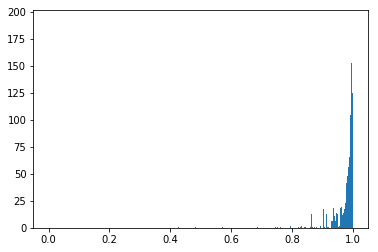

In [16]:
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_sents)
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.85:
        cnt += 1
        print i, r, trans_sents[i]
print cnt

###### Remove all non utf-8 characters

In [17]:
def remve_non_utf_8(s):
    s = ''.join(x for x in s if x in string.printable)
    return s

In [18]:
pool = Pool(4)
%time ts = pool.map(remve_non_utf_8, trans_sents)
pool.close()
pool.join()
print ts[:20]

CPU times: user 284 ms, sys: 216 ms, total: 500 ms
Wall time: 7.55 s
['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27', 'd aww he matches this background colour i m seemingly stuck with thanks talk 21 51 january 11 2016 utc ', 'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info ', ' more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any pref

CPU times: user 236 ms, sys: 124 ms, total: 360 ms
Wall time: 2.46 s
0


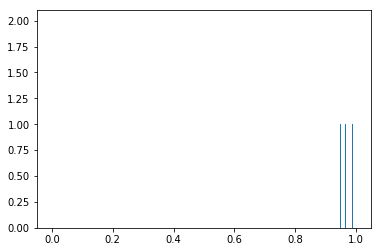

In [19]:
trans_sents = ts
pool = Pool(4)
%time Eng_ratio = pool.map(getRatio, trans_sents)
pool.close()
pool.join()
plt.hist(Eng_ratio, bins = np.arange(0, 1., 0.0002), histtype='bar')
cnt = 0
for i,r in enumerate(Eng_ratio):
    if r <= 0.85:
        cnt += 1
        print i, r, trans_sents[i]
print cnt

In [20]:
punc = list(set(string.punctuation)) 
punc += ['\n', '\t']
punc = set(punc)
def rmPunc(sent):
    return ''.join([ch for ch in str(sent) if ch not in punc])

In [21]:
pool = Pool(4)
%time ts = pool.map(rmPunc, trans_sents)
pool.close()
pool.join()
print ts[:20]
trans_sents = ts

CPU times: user 952 ms, sys: 316 ms, total: 1.27 s
Wall time: 4.55 s
['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27', 'd aww he matches this background colour i m seemingly stuck with thanks talk 21 51 january 11 2016 utc ', 'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info ', ' more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any pref

###### Remove multiple spaces

In [22]:
def rm_multi_spaces(s):
    return re.sub(' +',' ',s)

In [23]:
pool = Pool(4)
%time ts = pool.map(rm_multi_spaces, trans_sents)
pool.close()
pool.join()
print ts[:20]
trans_sents = ts

CPU times: user 304 ms, sys: 140 ms, total: 444 ms
Wall time: 2.8 s
['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now 89 205 38 27', 'd aww he matches this background colour i m seemingly stuck with thanks talk 21 51 january 11 2016 utc ', 'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info ', ' more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any prefe

In [24]:
new_train.comment_text = trans_sents
perm = np.random.permutation(len(raw_train))
test_idx = [99687, 99908, 100110, 100274]
test_df = pd.DataFrame({
    'raw': raw_train.comment_text.values[test_idx],
    'new': new_train.comment_text.values[test_idx],
    'translated': new_train_translated.comment_text.values[test_idx],
})
display(test_df)

,new,raw,translated
0,great happy editing,"""\nGreat, happy editing. ★☆ ☆★ """,great happy editing ★☆ ☆★
1,yeah audio examples would be illustrative fnl,"""\nYeah, audio examples would be illustrative....",yeah audio examples would be illustrative — ãː...
2,there are also and,There are also and ... (討論),there are also and 討論
3,firt i a oin o ie ou u and kee ou on iou durin...,"Firśt, I aṃ ģoinģ ţo ţie ŷou uṗ and keeṗ ŷou ç...",firśt i aṃ ģoinģ ţo ţie ŷou uṗ and keeṗ ŷou on...


In [25]:
# new_train.to_csv('train_processed1.csv', index=False)

###### Change numbers into "NUMBERS"

In [26]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False
sent = "I levae in 123 24.5 D5273 s 283 1 b 123"
for s in sent.split(' '):
    print is_number(s)

False
False
False
True
True
False
False
True
True
False
True


In [27]:
def replace_number(s):
    return ' '.join(['NUMBERS' if is_number(w) else w for w in s.split(' ')])
sent = replace_number(sent)
print sent

I levae in NUMBERS NUMBERS D5273 s NUMBERS NUMBERS b NUMBERS


In [28]:
from itertools import chain, groupby
def rm_multi_dash(s):
    return ' '.join(item[0] for item in groupby(s.split()))
st = rm_multi_dash(sent)
print st

I levae in NUMBERS D5273 s NUMBERS b NUMBERS


In [29]:
sent1 = "hate hate hate I hate hate hate hate"
st = rm_multi_dash(sent1)
print st

hate I hate


###### REPLACE NUMBERS FIRST

In [33]:
pool = Pool(4)
%time ts = pool.map(replace_number, trans_sents)
pool.close()
pool.join()
trans_sents = ts
print trans_sents[:20]

CPU times: user 332 ms, sys: 180 ms, total: 512 ms
Wall time: 26.9 s
['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now NUMBERS NUMBERS NUMBERS NUMBERS', 'd aww he matches this background colour i m seemingly stuck with thanks talk NUMBERS NUMBERS january NUMBERS NUMBERS utc ', 'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info ', ' more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one

In [34]:
new_train.comment_text = trans_sents
perm = np.random.permutation(len(raw_train))
test_idx = [99687, 99908, 100110, 100274]
test_df = pd.DataFrame({
    'raw': raw_train.comment_text.values[test_idx],
    'new': new_train.comment_text.values[test_idx],
    'translated': new_train_translated.comment_text.values[test_idx],
})
display(test_df)
new_train.to_csv('train_processed1.csv', index=False)

,new,raw,translated
0,great happy editing,"""\nGreat, happy editing. ★☆ ☆★ """,great happy editing ★☆ ☆★
1,yeah audio examples would be illustrative fnl,"""\nYeah, audio examples would be illustrative....",yeah audio examples would be illustrative — ãː...
2,there are also and,There are also and ... (討論),there are also and 討論
3,firt i a oin o ie ou u and kee ou on iou durin...,"Firśt, I aṃ ģoinģ ţo ţie ŷou uṗ and keeṗ ŷou ç...",firśt i aṃ ģoinģ ţo ţie ŷou uṗ and keeṗ ŷou on...


###### Remove continuous duplicated words

In [36]:
pool = Pool(4)
%time ts = pool.map(rm_multi_dash, trans_sents)
pool.close()
pool.join()
print ts[:20]

CPU times: user 312 ms, sys: 180 ms, total: 492 ms
Wall time: 2.33 s
['explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now NUMBERS', 'd aww he matches this background colour i m seemingly stuck with thanks talk NUMBERS january NUMBERS utc', 'hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info', 'more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preference

In [37]:
L1 = [len(x.split(' ')) for x in ts]
L2 = [len(x.split(' ')) for x in trans_sents]

(array([2.0035e+04, 2.6164e+04, 2.1733e+04, 1.6326e+04, 1.2822e+04,
        1.0213e+04, 7.8930e+03, 6.2150e+03, 4.9500e+03, 3.9870e+03,
        3.3920e+03, 2.8890e+03, 2.4330e+03, 1.9770e+03, 1.7330e+03,
        1.5300e+03, 1.4300e+03, 1.3220e+03, 1.1740e+03, 8.8000e+02,
        8.3800e+02, 7.4700e+02, 6.6800e+02, 5.7500e+02, 5.4300e+02,
        4.9700e+02, 4.9400e+02, 3.8600e+02, 3.7200e+02, 3.3700e+02,
        2.7900e+02, 2.5100e+02, 2.2900e+02, 2.1000e+02, 1.6800e+02,
        1.5100e+02, 1.7200e+02, 1.3300e+02, 1.4600e+02, 1.5600e+02,
        1.2400e+02, 1.1200e+02, 1.1700e+02, 8.5000e+01, 1.0100e+02,
        9.0000e+01, 8.6000e+01, 8.5000e+01, 9.2000e+01, 9.2000e+01,
        6.1000e+01, 6.2000e+01, 7.3000e+01, 6.4000e+01, 6.3000e+01,
        6.5000e+01, 7.5000e+01, 6.7000e+01, 6.8000e+01, 6.3000e+01,
        4.8000e+01, 6.1000e+01, 5.8000e+01, 6.0000e+01, 5.9000e+01,
        5.2000e+01, 5.2000e+01, 6.3000e+01, 7.2000e+01, 4.3000e+01,
        5.9000e+01, 5.4000e+01, 5.2000e+01, 4.20

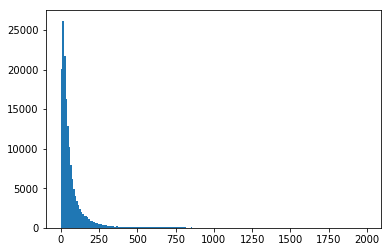

In [38]:
plt.hist(L1, bins = np.arange(0, 2000, 10), histtype='bar')

(array([1.6742e+04, 2.6219e+04, 2.1986e+04, 1.7013e+04, 1.3192e+04,
        1.0574e+04, 8.1870e+03, 6.3490e+03, 5.1700e+03, 4.1200e+03,
        3.4970e+03, 2.9430e+03, 2.5430e+03, 2.0240e+03, 1.7990e+03,
        1.5390e+03, 1.4700e+03, 1.3380e+03, 1.2050e+03, 9.4500e+02,
        7.9600e+02, 7.9300e+02, 7.2400e+02, 5.8200e+02, 5.2100e+02,
        5.1900e+02, 5.2400e+02, 4.0900e+02, 3.5600e+02, 3.7100e+02,
        2.6800e+02, 2.5400e+02, 2.2600e+02, 2.2500e+02, 1.6800e+02,
        1.6600e+02, 1.6200e+02, 1.4700e+02, 1.3800e+02, 1.5500e+02,
        1.2900e+02, 1.1600e+02, 1.1800e+02, 9.2000e+01, 1.1000e+02,
        8.5000e+01, 8.3000e+01, 8.6000e+01, 1.0500e+02, 8.4000e+01,
        7.0000e+01, 6.7000e+01, 6.2000e+01, 7.2000e+01, 6.2000e+01,
        6.3000e+01, 7.2000e+01, 7.2000e+01, 6.9000e+01, 6.2000e+01,
        5.2000e+01, 5.6000e+01, 7.6000e+01, 5.1000e+01, 5.4000e+01,
        5.9000e+01, 5.3000e+01, 5.3000e+01, 7.2000e+01, 5.1000e+01,
        5.6000e+01, 5.5000e+01, 5.4000e+01, 5.00

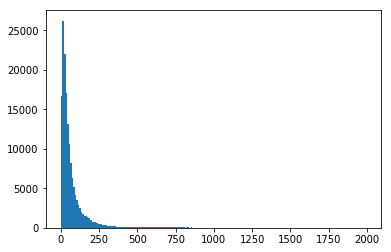

In [39]:
plt.hist(L2, bins = np.arange(0, 2000, 10), histtype='bar')

In [42]:
for i,vec in enumerate(ts):
    if len(vec.split(' ')) < 5:
        print i
        print "With dup:", trans_sents[i]
        print "Without dup: ", ts[i]

89
With dup: thanks reading there now 
Without dup:  thanks reading there now
177
With dup: NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS NUMBERS may NUMBERS
Without dup:  NUMBERS may NUMBERS
241
With dup:  listas sabina of bavaria
Without dup:  listas sabina of bavaria
281
With dup: NUMBERS utc NUMBERS NUMBERS NUMBERS december
Without dup:  NUMBERS utc NUMBERS december
299
With dup: how adorably disingenuous 
Without dup:  how adorably disingenuous
323
With dup: to a convicted felon
Without dup:  to a convicted felon
397
With dup: and revert his edits
Without dup:  and revert his edits
408
With dup: and capital gains tax
Without dup:  and capital gains tax
465
With dup: should be omitted entirely 
Without dup:  should be omitted entirely
632
With dup: it wasnt vandalism dickhead
Without dup:  it wasnt vandalism dickhead
743
With dup: thanks for fixing this 
Without dup:  thanks for fixing this
758
With dup:  listas manos family
Without dup:  listas ma

Without dup:  u r gay fuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfu

With dup: oceansplash NUMBERS dec NUMBERS NUMBERS NUMBERS
Without dup:  oceansplash NUMBERS dec NUMBERS
23560
With dup: splendid old chap 
Without dup:  splendid old chap
23611
With dup: questions cuntface 
Without dup:  questions cuntface
23668
With dup:  thanks you the info
Without dup:  thanks you the info
23722
With dup:  decline fucking bellend 
Without dup:  decline fucking bellend
23763
With dup:  bird of paradise 
Without dup:  bird of paradise
23819
With dup: i disagree but whatever
Without dup:  i disagree but whatever
23835
With dup: corvus cornix vivien leigh
Without dup:  corvus cornix vivien leigh
23932
With dup:  melbourne as temperate
Without dup:  melbourne as temperate
23981
With dup: NUMBERS NUMBERS NUMBERS february NUMBERS pst 
Without dup:  NUMBERS february NUMBERS pst
24069
With dup: NUMBERS NUMBERS NUMBERS jul NUMBERS utc 
Without dup:  NUMBERS jul NUMBERS utc
24225
With dup: hogtie this you faggot
Without dup:  hogtie this you faggot
24233
With dup:  talkback of

With dup:  talkback have a chat 
Without dup:  talkback have a chat
35384
With dup: ipads can be confusing 
Without dup:  ipads can be confusing
35397
With dup: thanks i appreciate it 
Without dup:  thanks i appreciate it
35411
With dup: school block please no 
Without dup:  school block please no
35419
With dup: ok thanks NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  ok thanks NUMBERS
35450
With dup: my comments are calculated
Without dup:  my comments are calculated
35493
With dup:  relisted the homunculus 
Without dup:  relisted the homunculus
35565
With dup: alex gackle on youtube
Without dup:  alex gackle on youtube
35778
With dup: thumbs up truce hugs 
Without dup:  thumbs up truce hugs
35821
With dup: precisely very well put 
Without dup:  precisely very well put
35830
With dup: budgiekiller is a panzy
Without dup:  budgiekiller is a panzy
35870
With dup:  NUMBERS cats NUMBERS total 
Without dup:  NUMBERS cats NUMBERS total
35923
With dup: thanks for explanation 
Without dup:  t

With dup: boo to odst NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  boo to odst NUMBERS
47217
With dup: cream my pussy sexbot 
Without dup:  cream my pussy sexbot
47218
With dup: see in particular 
Without dup:  see in particular
47245
With dup:  merci sincerement tally ho 
Without dup:  merci sincerement tally ho
47254
With dup: NUMBERS NUMBERS NUMBERS feb NUMBERS utc 
Without dup:  NUMBERS feb NUMBERS utc
47278
With dup: note unusable logo 
Without dup:  note unusable logo
47334
With dup:  accept granting ipbe 
Without dup:  accept granting ipbe
47358
With dup: sorry man my bad 
Without dup:  sorry man my bad
47372
With dup: aget a fucking lifeutosigned
Without dup:  aget a fucking lifeutosigned
47429
With dup: thank you very much 
Without dup:  thank you very much
47665
With dup: june NUMBERS NUMBERS june NUMBERS NUMBERS
Without dup:  june NUMBERS june NUMBERS
47671
With dup: bummed by yours truly
Without dup:  bummed by yours truly
47672
With dup: hola fucker hola fucker
Without du

58855
With dup: articles merged NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  articles merged NUMBERS
58985
With dup: NUMBERS libyan civil war
Without dup:  NUMBERS libyan civil war
59010
With dup: than in edit summary
Without dup:  than in edit summary
59031
With dup: support for same reasons 
Without dup:  support for same reasons
59039
With dup: read before you speak 
Without dup:  read before you speak
59054
With dup: heaven salvation and god 
Without dup:  heaven salvation and god
59112
With dup:  NUMBERS NUMBERS NUMBERS jun NUMBERS utc
Without dup:  NUMBERS jun NUMBERS utc
59115
With dup: NUMBERS NUMBERS NUMBERS aug NUMBERS utc 
Without dup:  NUMBERS aug NUMBERS utc
59129
With dup: thanks happy image taking 
Without dup:  thanks happy image taking
59143
With dup: see you lousy cunt
Without dup:  see you lousy cunt
59226
With dup:  unblock request 
Without dup:  unblock request
59305
With dup:  no problem uk 
Without dup:  no problem uk
59332
With dup: then sign in talk 
Without d

Without dup:  hero s like yourself
70504
With dup: oppose merge cheers talk
Without dup:  oppose merge cheers talk
70585
With dup: mind your business
Without dup:  mind your business
70611
With dup: the pronunciation is it 
Without dup:  the pronunciation is it
70692
With dup: NUMBERS NUMBERS NUMBERS sep NUMBERS utc 
Without dup:  NUMBERS sep NUMBERS utc
70711
With dup:  blocked tagged cheers xman 
Without dup:  blocked tagged cheers xman
70735
With dup:  redundant much joe 
Without dup:  redundant much joe
70766
With dup: a little help please
Without dup:  a little help please
70810
With dup:  chief warrant officer
Without dup:  chief warrant officer
70817
With dup: sahrawi youth union 
Without dup:  sahrawi youth union
70830
With dup: thanks i will now 
Without dup:  thanks i will now
70835
With dup: something like that 
Without dup:  something like that
70931
With dup: earhart binksternet 
Without dup:  earhart binksternet
70963
With dup: bite me irishguy contextflexed 
Without dup:

Without dup:  edit warring talk
83980
With dup: bring it NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  bring it NUMBERS
84015
With dup:  continued from above 
Without dup:  continued from above
84059
With dup: continue to add helpful
Without dup:  continue to add helpful
84126
With dup:  fyi fyi lawrence cohen 
Without dup:  fyi lawrence cohen
84226
With dup:  user stwalkerster talk 
Without dup:  user stwalkerster talk
84244
With dup:  is what i deleted 
Without dup:  is what i deleted
84333
With dup:  with the original history
Without dup:  with the original history
84350
With dup:  i would ask user 
Without dup:  i would ask user
84352
With dup: i strongly agree NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  i strongly agree NUMBERS
84400
With dup: are you persian iranian 
Without dup:  are you persian iranian
84451
With dup: being lazy in raising
Without dup:  being lazy in raising
84492
With dup:  have a great day 
Without dup:  have a great day
84653
With dup: looks fine thank you

Without dup:  everyone is welcome chat
96753
With dup: through the discovery process
Without dup:  through the discovery process
96787
With dup: kleargear paid whoore o 
Without dup:  kleargear paid whoore o
96828
With dup: why so NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  why so NUMBERS
96872
With dup: cunt fuck you cunt 
Without dup:  cunt fuck you cunt
96880
With dup: regarding this edit 
Without dup:  regarding this edit
96903
With dup:  class start importance high
Without dup:  class start importance high
96915
With dup: headlining as another name
Without dup:  headlining as another name
97010
With dup: bunch of cockfag douchebags
Without dup:  bunch of cockfag douchebags
97039
With dup:  unless eponymous same year 
Without dup:  unless eponymous same year
97051
With dup: removed dispute banner 
Without dup:  removed dispute banner
97054
With dup: excellent suggestion 
Without dup:  excellent suggestion
97070
With dup:  good i agree talk 
Without dup:  good i agree talk
97083
W

Without dup:  pwned ahahahahaha pwned NUMBERS
108167
With dup:  no problem riana 
Without dup:  no problem riana
108171
With dup: anodea judith using and
Without dup:  anodea judith using and
108225
With dup: comparison of layout engines
Without dup:  comparison of layout engines
108269
With dup: katanada thanks bro 
Without dup:  katanada thanks bro
108286
With dup: thanks again mitchell
Without dup:  thanks again mitchell
108476
With dup:  unblocking 2nd nomination 
Without dup:  unblocking 2nd nomination
108479
With dup: new quote pic
Without dup:  new quote pic
108587
With dup: only being russian guy 
Without dup:  only being russian guy
108614
With dup: good morning america
Without dup:  good morning america
108626
With dup:  NUMBERS NUMBERS NUMBERS december NUMBERS utc
Without dup:  NUMBERS december NUMBERS utc
108642
With dup: sledgehog0 i have returned 
Without dup:  sledgehog0 i have returned
108647
With dup: mind yo damn buisness
Without dup:  mind yo damn buisness
108658
Wit

117844
With dup:  talkback bark dig 
Without dup:  talkback bark dig
117870
With dup: talkback talk to me 
Without dup:  talkback talk to me
117893
With dup: NUMBERS NUMBERS mar NUMBERS NUMBERS utc 
Without dup:  NUMBERS mar NUMBERS utc
117933
With dup: i support the suggestion 
Without dup:  i support the suggestion
117953
With dup: NUMBERS NUMBERS NUMBERS october NUMBERS
Without dup:  NUMBERS october NUMBERS
117958
With dup:  wow thats alot NUMBERS 
Without dup:  wow thats alot NUMBERS
117992
With dup: just disregard this all 
Without dup:  just disregard this all
118056
With dup: NUMBERS september NUMBERS utc 
Without dup:  NUMBERS september NUMBERS utc
118069
With dup: from ilana of konel
Without dup:  from ilana of konel
118072
With dup:  long but more accurate
Without dup:  long but more accurate
118100
With dup: NUMBERS NUMBERS NUMBERS february NUMBERS
Without dup:  NUMBERS february NUMBERS
118106
With dup: changed as suggested 
Without dup:  changed as suggested
118156
With dup

Without dup:  another one nableezy
130892
With dup:  second level warning 
Without dup:  second level warning
130919
With dup: truth sent from above
Without dup:  truth sent from above
130946
With dup: drew fairweather dmd
Without dup:  drew fairweather dmd
130947
With dup: thanks for the huskie 
Without dup:  thanks for the huskie
130969
With dup:  regarding kill claims 
Without dup:  regarding kill claims
131062
With dup: you patrol the sandbox 
Without dup:  you patrol the sandbox
131169
With dup: thanks for the info 
Without dup:  thanks for the info
131179
With dup: passed congratulations 
Without dup:  passed congratulations
131180
With dup:  welcome to wikipedia 
Without dup:  welcome to wikipedia
131192
With dup:  see below goodness gracious 
Without dup:  see below goodness gracious
131198
With dup:  spyder00boi talk 
Without dup:  spyder00boi talk
131205
With dup:  scott april NUMBERS NUMBERS
Without dup:  scott april NUMBERS
131206
With dup: thanks for your reply 
Without du

142482
With dup:  and the example imho 
Without dup:  and the example imho
142532
With dup: someone sounds scared 
Without dup:  someone sounds scared
142533
With dup:  request a revision
Without dup:  request a revision
142554
With dup: fuck off fuck off 
Without dup:  fuck off fuck off
142578
With dup: location is azerbaijan 
Without dup:  location is azerbaijan
142660
With dup:  sockpuppet investigation talk 
Without dup:  sockpuppet investigation talk
142702
With dup:  talk contribs 
Without dup:  talk contribs
142704
With dup:  a salishan language
Without dup:  a salishan language
142767
With dup: faggggggggggggit drew likes penis
Without dup:  faggggggggggggit drew likes penis
142777
With dup: cunt cunt cunt cunt cunt
Without dup:  cunt
142797
With dup:  thank you talk 
Without dup:  thank you talk
142798
With dup: thanks for the explanation 
Without dup:  thanks for the explanation
142808
With dup: oh please81 NUMBERS NUMBERS NUMBERS
Without dup:  oh please81 NUMBERS
142812
With

154369
With dup:  doesn t matter what 
Without dup:  doesn t matter what
154394
With dup: tocboothy is a fucker
Without dup:  tocboothy is a fucker
154397
With dup: and a chocolate company
Without dup:  and a chocolate company
154427
With dup:  redirect moongileri
Without dup:  redirect moongileri
154453
With dup: block appeal a block 
Without dup:  block appeal a block
154487
With dup:  alright sounds good holla 
Without dup:  alright sounds good holla
154494
With dup: NUMBERS NUMBERS NUMBERS december NUMBERS
Without dup:  NUMBERS december NUMBERS
154496
With dup: scavenger than a predator 
Without dup:  scavenger than a predator
154607
With dup: is dat some hermaprite
Without dup:  is dat some hermaprite
154732
With dup: hello talk
Without dup:  hello talk
154737
With dup: august NUMBERS january NUMBERS NUMBERS
Without dup:  august NUMBERS january NUMBERS
154809
With dup: ok thanks NUMBERS NUMBERS NUMBERS NUMBERS
Without dup:  ok thanks NUMBERS
154837
With dup: in individual comments